In [25]:
import pandas as pd
df=pd.read_csv(r"C:\Users\deeps\Downloads\stock_train.csv")
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [26]:
x=df["Open"]
x=np.array(x).reshape(len(x),1)#Convert 2d array---> ehy--->encoding and scaling demands 2d array
print(x.shape)

(1258, 1)


In [27]:
# More the timestamp more will be accuracy  and speed will be slow

In [28]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [29]:
x_stock=[]
y_stock=[]


In [30]:
#How to convert timeseries stamp
for i in range(30,len(x)):
    x_stock.append(x[i-30:i])
    y_stock.append(x[i])

In [31]:
print(x_stock,y_stock)

[array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517]]), array([[0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.

In [32]:
print(y_stock)

[array([0.04873875]), array([0.03936305]), array([0.04137213]), array([0.04034898]), array([0.04784582]), array([0.04325099]), array([0.04356723]), array([0.04286033]), array([0.04602277]), array([0.05398467]), array([0.05738894]), array([0.05714711]), array([0.05569611]), array([0.04421832]), array([0.04514845]), array([0.04605997]), array([0.04412531]), array([0.03675869]), array([0.04486941]), array([0.05065481]), array([0.05214302]), array([0.05612397]), array([0.05818885]), array([0.06540665]), array([0.06882953]), array([0.07243843]), array([0.07993526]), array([0.07846566]), array([0.08034452]), array([0.08497656]), array([0.08627874]), array([0.08471612]), array([0.07454052]), array([0.07883771]), array([0.07238262]), array([0.06663442]), array([0.06315574]), array([0.06782499]), array([0.06823424]), array([0.07601012]), array([0.08082819]), array([0.05807724]), array([0.04468338]), array([0.04421832]), array([0.04202322]), array([0.04070243]), array([0.03017338]), array([0.035

In [33]:
import numpy as np
x_stock=np.array(x_stock)
y_stock=np.array(y_stock)
x_stock

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.0440695 ],
        [0.04648783],
        [0.04745517]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04648783],
        [0.04745517],
        [0.04873875]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.04745517],
        [0.04873875],
        [0.03936305]],

       ...,

       [[0.88637547],
        [0.87032145],
        [0.88563137],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.87032145],
        [0.88563137],
        [0.90743359],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.88563137],
        [0.90743359],
        [0.91571173],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [34]:
y_stock

array([[0.04873875],
       [0.03936305],
       [0.04137213],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [35]:
# RNN--->Recurrent Neural Network

In [36]:
#training 
#Data shape --->(rowe,timestamp,features)
#rows--->no of samples
#timestamp--->no of days required to predict one stock
#features--->no of independent features using to predict
print(x_stock.shape)

(1228, 30, 1)


In [37]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential
lstm=Sequential()
#we used relu because we need a numerical number
#first lstm layer--->It extracts basic sequential features from input data reload a second when the loss is not reducing
lstm.add(LSTM(units=50,input_shape=(x_stock.shape[1],x_stock.shape[2]),return_sequences=True))# input shape accept one shape
lstm.add(Dropout(0.20))

#second lstm layer--->it takes output from first layer learns more compex and higher levvel patterns that may requier deeper understanding 
lstm.add(LSTM(units=20))

#output layer
lstm.add(Dense(units=1,activation="relu"))

C:\Users\deeps\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
#compiling
# Available optimizers
# SGD
# RMSprop
# Adam
# AdamW
# Adadelta
# Adagrad
# Adamax
# Adafactor
# Nadam
# Ftrl
# Lion
# Lamb
# Loss Scale Optimizer
lstm.compile(optimizer="adam",loss="mean_squared_error")

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 0.0449
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0019
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0016
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0014
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0016
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0013
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0013
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0012
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0013
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0011
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0011
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0012
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0011
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0011
Epoch 15/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4

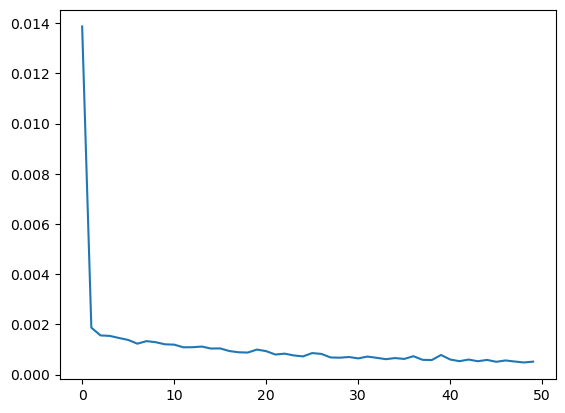

In [39]:
#fit
history=lstm.fit(x_stock,y_stock,batch_size=10,epochs=50)
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()

In [40]:
# When return sequence =true sequel return the output each time stamp these means output will be sequence of output not the final one

In [41]:
#prediction
y_pred=lstm.predict(x_stock)
print(y_pred)

39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
[[0.05311034]
 [0.05318534]
 [0.05052381]
 ...
 [0.93650883]
 [0.9404868 ]
 [0.9308653 ]]


In [42]:
y_stock

array([[0.04873875],
       [0.03936305],
       [0.04137213],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [43]:
y_stock=scaler.inverse_transform(y_stock)
y_stock #actual value 

array([[305.32],
       [300.28],
       [301.36],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [44]:
y_pred=scaler.inverse_transform(y_pred)
y_pred #predicted value

array([[307.66998],
       [307.71033],
       [306.2796 ],
       ...,
       [782.5497 ],
       [784.68805],
       [779.5159 ]], dtype=float32)

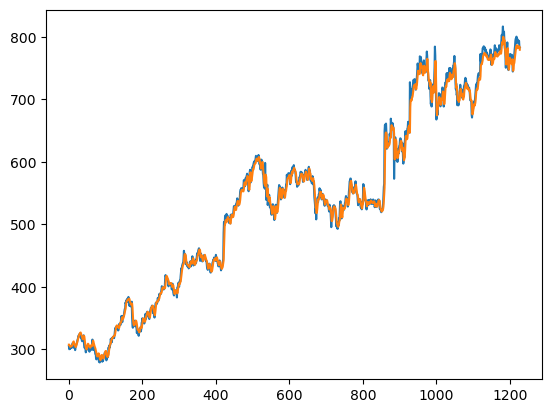

In [45]:
plt.plot(y_stock)
plt.plot(y_pred)
plt.show()

In [46]:
last_30_days=x[-30:]
print(last_30_days.shape)#2d array

(30, 1)


In [47]:
#convert into 2d array into 3d array for prediction in lstm
last_30_days=np.reshape(last_30_days,(1,30,1))
print(last_30_days.shape)#now it is in 3d array

(1, 30, 1)


In [48]:
print(last_30_days)

[[[0.90743359]
  [0.91571173]
  [0.89941588]
  [0.91805566]
  [0.9089404 ]
  [0.9024853 ]
  [0.89456061]
  [0.91600938]
  [0.9132934 ]
  [0.88979835]
  [0.86589404]
  [0.89030062]
  [0.90335962]
  [0.89642086]
  [0.91777662]
  [0.93176576]
  [0.94114145]
  [0.95762334]
  [0.96413424]
  [0.96402262]
  [0.96971501]
  [0.95077759]
  [0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]
  [0.93688146]]]


In [49]:
jan_1_2017=lstm.predict(last_30_days)
jan_1_2017

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0.9260988]], dtype=float32)

In [50]:
jan_1_2017=scaler.inverse_transform(jan_1_2017)
print(jan_1_2017) #final predicted value

[[776.9537]]


In [51]:
#forecasting of stock price for next 10 days
predict=np.array([])
for i in range(10):
    d=x[-30:]
    next_day=lstm.predict(np.reshape(d,(1,30,1)))
    predict=np.append(predict,next_day)#comparsion
    x=np.append(x,next_day)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [52]:
print(predict)

[0.92609882 0.91929078 0.91347313 0.9086954  0.90466255 0.90105605
 0.89763403 0.89424783 0.89084536 0.88742965]


In [53]:
predict=scaler.inverse_transform(np.reshape(predict,(10,1)))
print(predict) #next 10 days forecasting

[[776.95368359]
 [773.29395225]
 [770.16661537]
 [767.5982991 ]
 [765.43040011]
 [763.49169091]
 [761.65214884]
 [759.83186345]
 [758.00283085]
 [756.16668513]]
